In [17]:
import mysql.connector

# Define connection parameters
config = {
  'user': 'airflow',
  'password': 'airflow',
  'host': 'localhost',  # or your MySQL container IP address
  'port': '3306',        # or the port you've mapped to your MySQL container
  'database': 'cricket_info',
  'raise_on_warnings': True
}

# Establish connection
try:
    connection = mysql.connector.connect(**config)
    print("Connected to MySQL database")
except mysql.connector.Error as err:
    print(f"Error: {err}")

# Perform database operations
# For example, execute a query
if 'connection' in locals():
    cursor = connection.cursor()
    cursor.execute("SELECT * FROM matches LIMIT 5")
    rows = cursor.fetchall()
    for row in rows:
        print(row)
else:
    print("Connection to the database failed.")

# Close connection
if 'connection' in locals():
    connection.close()

Connected to MySQL database
(1, 'South Africa', 'New Zealand', 'New Zealand', '5 wickets', 'Johannesburg', 'Oct 21, 2005', 'T20I # 3', '/series/new-zealand-tour-of-south-africa-2005-06-212910/south-africa-vs-new-zealand-only-t20i-222678/full-scorecard', 133, 10, '20', 134, 5, '18', '20', '20', 'South Africa', 'New Zealand', 'match summary harvested', datetime.datetime(2024, 4, 10, 19, 20, 26), datetime.datetime(2024, 4, 10, 19, 20, 26))
(2, 'England', 'Australia', 'England', '100 runs', 'Southampton', 'Jun 13, 2005', 'T20I # 2', '/series/australia-tour-of-england-and-scotland-2005-139019/england-vs-australia-only-t20i-211028/full-scorecard', 179, 8, '20', 79, 10, '14.3', '20', '20', 'England', 'Australia', 'match summary harvested', datetime.datetime(2024, 4, 10, 19, 20, 26), datetime.datetime(2024, 4, 10, 19, 20, 26))
(3, 'New Zealand', 'Australia', 'Australia', '44 runs', 'Auckland', 'Feb 17, 2005', 'T20I # 1', '/series/australia-tour-of-new-zealand-2004-05-61407/new-zealand-vs-austr

In [18]:
import mysql.connector
import pandas as pd

# Define connection parameters
config = {
  'user': 'airflow',
  'password': 'airflow',
  'host': 'localhost',  # or your MySQL container IP address
  'port': '3306',        # or the port you've mapped to your MySQL container
  'database': 'cricket_info',
  'raise_on_warnings': True
}

# Establish connection
try:
    connection = mysql.connector.connect(**config)
    print("Connected to MySQL database")
except mysql.connector.Error as err:
    print(f"Error: {err}")

# Perform database operations and create DataFrame
if 'connection' in locals():
    # SQL query to select specific fields from the table
    sql_query = """
    SELECT match_id, winner, match_date
    FROM matches
    WHERE team_1 = 'Sri Lanka' OR team_2 = 'Sri Lanka'
    """

    # Read data into a DataFrame
    df = pd.read_sql(sql_query, connection)

    # Print the DataFrame
    print(df)

    # Close connection
    connection.close()
else:
    print("Connection to the database failed.")


Connected to MySQL database
        match_id       winner    match_date
0      T20I # 12  New Zealand  Dec 26, 2006
1      T20I # 11    Sri Lanka  Dec 22, 2006
2       T20I # 7    Sri Lanka  Jun 15, 2006
3      T20I # 41    Australia  Sep 20, 2007
4      T20I # 38    Sri Lanka  Sep 18, 2007
..           ...          ...           ...
184  T20I # 2480    Sri Lanka  Feb 19, 2024
185  T20I # 2479    Sri Lanka  Feb 17, 2024
186  T20I # 2436    Sri Lanka  Jan 18, 2024
187  T20I # 2433     Zimbabwe  Jan 16, 2024
188  T20I # 2432    Sri Lanka  Jan 14, 2024

[189 rows x 3 columns]


/var/folders/y3/k251xs_s3c3dgw01ys3t1_wm0000gq/T/ipykernel_22800/675057480.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, connection)


Matplotlib is building the font cache; this may take a moment.


Connected to MySQL database


/var/folders/y3/k251xs_s3c3dgw01ys3t1_wm0000gq/T/ipykernel_22800/1520010133.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, connection)


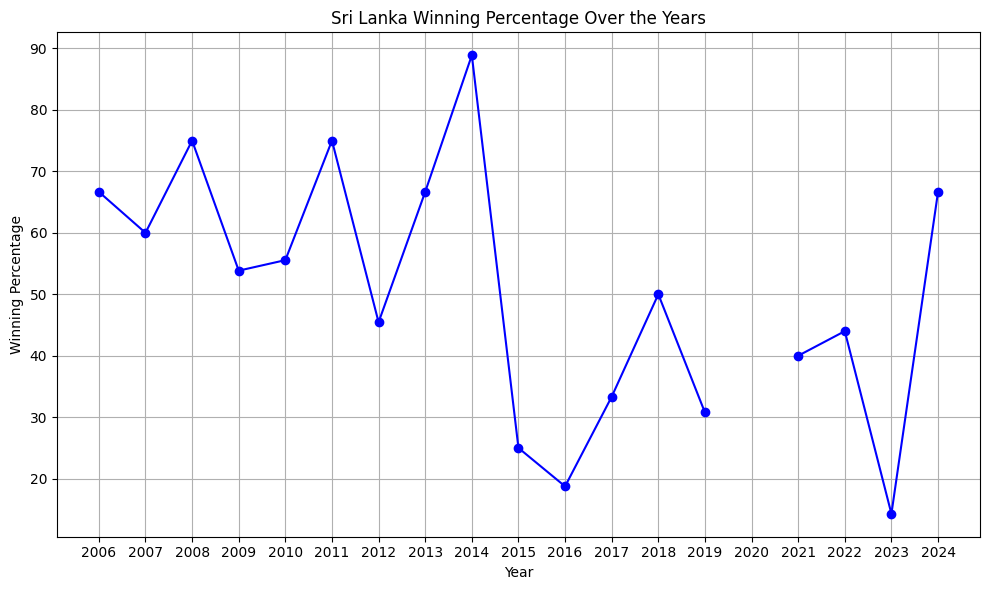

In [20]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Define connection parameters
config = {
  'user': 'airflow',
  'password': 'airflow',
  'host': 'localhost',  # or your MySQL container IP address
  'port': '3306',        # or the port you've mapped to your MySQL container
  'database': 'cricket_info',
  'raise_on_warnings': True
}

# Establish connection
try:
    connection = mysql.connector.connect(**config)
    print("Connected to MySQL database")
except mysql.connector.Error as err:
    print(f"Error: {err}")

# Perform database operations and create DataFrame
if 'connection' in locals():
    # SQL query to select specific fields from the table
    sql_query = """
    SELECT match_id, winner, match_date
    FROM matches
    WHERE team_1 = 'Sri Lanka' OR team_2 = 'Sri Lanka'
    """

    # Read data into a DataFrame
    df = pd.read_sql(sql_query, connection)

    # Close connection
    connection.close()

    # Convert match_date to datetime
    df['match_date'] = pd.to_datetime(df['match_date'])

    # Extract year from match_date
    df['year'] = df['match_date'].dt.year

    # Calculate winning percentage for Sri Lanka by year
    sri_lanka_wins = df[df['winner'] == 'Sri Lanka'].groupby('year').size()
    total_matches = df.groupby('year').size()
    sri_lanka_win_percentage = (sri_lanka_wins / total_matches) * 100

    # Plotting the line chart
    plt.figure(figsize=(10, 6))
    sri_lanka_win_percentage.plot(marker='o', color='b', linestyle='-')
    plt.title('Sri Lanka Winning Percentage Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Winning Percentage')
    plt.grid(True)
    plt.xticks(sri_lanka_win_percentage.index)
    plt.tight_layout()
    plt.show()

else:
    print("Connection to the database failed.")
